In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/zhlj/code/solar_panel_segmentation/tests'

In [3]:
X1 = plt.imread("./IMAGE/vienna30.tif")
y1 = plt.imread("./MASK/vienna30.tif")

In [4]:
X2 = plt.imread("./IMAGE/vienna31.tif")
y2 = plt.imread("./MASK/vienna31.tif")

In [5]:
X3 = plt.imread("./IMAGE/vienna32.tif")
y3 = plt.imread("./MASK/vienna32.tif")

In [6]:
X4 = plt.imread("./IMAGE/vienna33.tif")
y4 = plt.imread("./MASK/vienna33.tif")

In [7]:
X1.shape

(5000, 5000, 3)

In [8]:
X_train = np.array([X1,X2,X3])
y_train = np.array([y1,y2,y3])
X_test = np.array([X4])
y_test = np.array([y4])

In [9]:
X_train.shape

(3, 5000, 5000, 3)

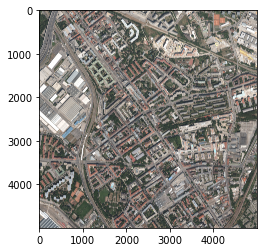

In [10]:
plt.imshow(X1)

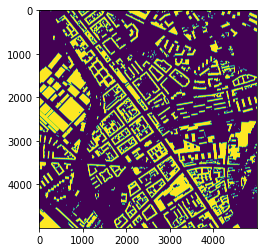

In [11]:
plt.imshow(y1)

In [12]:
X_train_tmp = X_train[:,:256,:256,:]
X_test_tep = X_test[:,:256,:256,:]

In [13]:
from tensorflow.keras import models, layers

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(16,8,padding='same',activation = 'relu', input_shape = X_train_tmp.shape[1:4]))
model.add(layers.Conv2D(32,8,padding='same',activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32,4,padding='same',activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,4,padding='same',activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.Conv2D(128,4,activation = 'relu'))
#model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.Conv2D(2,4,activation = 'relu'))

#flatten layer
#model.add(layers.Flatten())
model.add(layers.Conv2DTranspose(2, kernel_size = 8, strides = 8))
#model.add(layers.UpSampling2D())
#Dense layer

#model.add(layers.Dense(2, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      3088      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      32800     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        3

2022-11-29 18:07:25.519481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-29 18:07:25.547586: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-29 18:07:25.548287: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-29 18:07:25.548689: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [15]:
y_train.shape

(3, 5000, 5000)

In [16]:
model.fit(X_train_tmp, y_train[:,:256,:256]/255, epochs=5, batch_size = 1)

Epoch 1/5


2022-11-29 18:07:28.684314: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8700
2022-11-29 18:07:29.359706: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


3/3 [==============================] - 3s 27ms/step - loss: 0.9342 - accuracy: 0.5912
Epoch 2/5
3/3 [==============================] - 0s 25ms/step - loss: 0.7147 - accuracy: 0.6855
Epoch 3/5
3/3 [==============================] - 0s 29ms/step - loss: 0.6725 - accuracy: 0.6774
Epoch 4/5
3/3 [==============================] - 0s 27ms/step - loss: 0.6634 - accuracy: 0.7173
Epoch 5/5
3/3 [==============================] - 0s 27ms/step - loss: 0.6393 - accuracy: 0.7377


In [17]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

ds = tf.keras.preprocessing.image_dataset_from_directory("./IMAGE/",
                                                         batch_size = 1)